# Projeto 2 - Ciência dos dados

**Integrantes:**
</p>

- Amanda Carmo

</p>

- Vitor Miada

In [517]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

In [518]:

dados_driver = pd.read_csv('drivers.csv')
dados_quali = pd.read_csv('quali.csv')
dados_result = pd.read_csv('results.csv')
dados_circuit = pd.read_csv('a.csv')
dados_race = pd.read_csv('b.csv')
dados_contresult = pd.read_csv('contresu.csv')
dados_escud = pd.read_csv('cont.csv')

In [519]:
#dados_driver.head()

In [520]:
#dados_quali.head()

In [521]:
dados_result
dados_result.head(30)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [522]:
dados_circuit.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


In [523]:
#dados_race.head(10)

In [524]:
#dados_escud.head()

In [525]:
#dados_contresult.head()

____
### Limpando os dados

O primeiro passo a ser feito é o tratamento dos datasets com o objetivo de se ter uma leitura mais limpa, focando-se naquilo que será analisado.

- dados do corredor:

In [526]:
dados_driver = dados_driver.drop(dados_driver.columns[[3, 4, 5, 6, 8]], axis=1) 

In [527]:
dados_driver.head()

,driverId,driverRef,number,nationality
0,1,hamilton,44,British
1,2,heidfeld,\N,German
2,3,rosberg,6,German
3,4,alonso,14,Spanish
4,5,kovalainen,\N,Finnish


.

- dados da qualificação:

In [528]:
dados_quali = dados_quali.drop(dados_quali.columns[[6, 7, 8]], axis=1) 

In [529]:
dados_quali.head()

,qualifyId,raceId,driverId,constructorId,number,position
0,1,18,1,1,22,1
1,2,18,9,2,4,2
2,3,18,5,1,23,3
3,4,18,13,6,2,4
4,5,18,2,2,3,5


.

- dados da escuderia:

In [530]:
dados_escud = dados_escud.drop(dados_escud.columns[[1, 4]], axis=1) 

.

- dados da corrida:

In [531]:
dados_race = dados_race.drop(dados_race.columns[[2, 5, 6, 7]], axis=1) 

In [532]:
dados_race.head()

,raceId,year,circuitId,name
0,1,2009,1,Australian Grand Prix
1,2,2009,2,Malaysian Grand Prix
2,3,2009,17,Chinese Grand Prix
3,4,2009,3,Bahrain Grand Prix
4,5,2009,4,Spanish Grand Prix


.

- dados do circuito:

In [533]:
dados_circuit = dados_circuit.drop(dados_circuit.columns[[1, 3, 5, 6, 7, 8]], axis=1) 

In [534]:
dados_circuit.head()

,circuitId,name,country
0,1,Albert Park Grand Prix Circuit,Australia
1,2,Sepang International Circuit,Malaysia
2,3,Bahrain International Circuit,Bahrain
3,4,Circuit de Barcelona-Catalunya,Spain
4,5,Istanbul Park,Turkey


.

- Resultados

Escuderia:

In [535]:
dados_contresult =  dados_contresult.drop(dados_contresult.columns[[5]], axis=1).sort_values(by=['raceId'])

In [536]:
dados_contresult.head()

,constructorStandingsId,raceId,constructorId,points,position,wins
3666,4046,1,6,0.0,9,0
3667,4044,1,2,0.0,7,0
3668,4045,1,9,0.0,8,0
3669,4043,1,10,0.0,6,0
3670,4042,1,5,3.0,5,0


Geral:

In [537]:
pontos = dados_contresult.drop(columns = ['constructorStandingsId', 'position', 'constructorId', 'wins'])

In [538]:
pontos.head()

,raceId,points
3666,1,0.0
3667,1,0.0
3668,1,0.0
3669,1,0.0
3670,1,3.0


In [539]:
#dados_result.head(19)

In [540]:
dados_result =  dados_result.drop(dados_result.columns[[5, 7, 9, 10,11,12,13,15,16,17]], axis=1) 

In [541]:
dados_result.head(15)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank
0,1,18,1,1,22,1,1,2
1,2,18,2,2,3,2,2,3
2,3,18,3,3,7,3,3,5
3,4,18,4,4,5,4,4,7
4,5,18,5,1,23,5,5,1
5,6,18,6,3,8,6,6,14
6,7,18,7,5,14,7,7,12
7,8,18,8,6,1,8,8,4
8,9,18,9,2,4,\N,9,9
9,10,18,10,7,12,\N,10,13


In [542]:
dados_results = dados_result.sort_values(by=['raceId'])

In [543]:
dados_results.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank
7572,7573,1,1,1,1,\N,20,13
7571,7572,1,5,1,2,\N,19,\N
7570,7571,1,6,3,17,\N,18,18
7569,7570,1,12,4,8,\N,17,19
7568,7569,1,13,6,3,\N,16,15


In [544]:
resultsi = dados_results.merge(dados_race, on = 'raceId', how = 'left')

In [545]:
resultsi.head(30).head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,year,circuitId,name
0,7573,1,1,1,1,\N,20,13,2009,1,Australian Grand Prix
1,7572,1,5,1,2,\N,19,\N,2009,1,Australian Grand Prix
2,7571,1,6,3,17,\N,18,18,2009,1,Australian Grand Prix
3,7570,1,12,4,8,\N,17,19,2009,1,Australian Grand Prix
4,7569,1,13,6,3,\N,16,15,2009,1,Australian Grand Prix


In [546]:
results = resultsi.drop(resultsi.columns[[8,10]], axis=1)

In [547]:
results.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
0,7573,1,1,1,1,\N,20,13,1
1,7572,1,5,1,2,\N,19,\N,1
2,7571,1,6,3,17,\N,18,18,1
3,7570,1,12,4,8,\N,17,19,1
4,7569,1,13,6,3,\N,16,15,1


In [548]:
F_result = results.merge(pontos, on = 'raceId', how = 'left')

In [549]:
F_result.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId,points
0,7573,1,1,1,1,\N,20,13,1,0.0
1,7573,1,1,1,1,\N,20,13,1,0.0
2,7573,1,1,1,1,\N,20,13,1,0.0
3,7573,1,1,1,1,\N,20,13,1,0.0
4,7573,1,1,1,1,\N,20,13,1,3.0


___
De modo a deixar a base de dados mais limpa, serão consideradas as oito primeiras posições:

# AQUI É ONDE MUDA O NUMERO DE POSICÕES A SEREM PREVISTAS

In [550]:
dados = results[results['positionOrder'].map(int) < 8]

In [551]:
dados.head(3)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
13,7556,1,15,7,9,3,3,10,1


___

### ANALISE EXPLORATORIA


In [552]:
#taxa de vitoria da escuderia 
dados_taxa = pd.crosstab(dados_contresult['constructorId'],dados_contresult['position'], normalize = "index" )
dados_taxa.head()


position,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
constructorId,,,,,,,,,,,,,,,,,,,,,
1,0.200730,0.223844,0.149635,0.114355,0.082725,0.071776,0.034063,0.030414,0.043796,0.010949,...,0.001217,0.006083,0.001217,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.014286,0.342857,0.157143,0.000000,0.185714,0.114286,0.057143,0.128571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.152000,0.128000,0.134667,0.164000,0.086667,0.058667,0.058667,0.042667,0.061333,0.066667,...,0.001333,0.002667,0.001333,0.005333,0.010667,0.000000,0.0,0.0,0.0,0.0
4,0.118252,0.061697,0.120823,0.213368,0.167095,0.066838,0.077121,0.043702,0.051414,0.002571,...,0.010283,0.005141,0.017995,0.005141,0.017995,0.002571,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.003731,0.041045,0.164179,0.268657,0.205224,0.287313,0.029851,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [553]:
dados_taxa_filtrado = dados_taxa.sort_values(by=1).tail(11)
dados_taxa_filtrado.head()

position,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
constructorId,,,,,,,,,,,,,,,,,,,,,
1,0.200730,0.223844,0.149635,0.114355,0.082725,0.071776,0.034063,0.030414,0.043796,0.010949,...,0.001217,0.006083,0.001217,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
9,0.220280,0.171329,0.269231,0.076923,0.055944,0.094406,0.073427,0.034965,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
180,0.222222,0.240741,0.111111,0.074074,0.111111,0.018519,0.018519,0.000000,0.000000,0.000000,...,0.018519,0.166667,0.018519,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
170,0.224719,0.044944,0.123596,0.213483,0.157303,0.011236,0.000000,0.033708,0.056180,0.000000,...,0.000000,0.011236,0.056180,0.0,0.05618,0.0,0.0,0.0,0.0,0.0
87,0.235294,0.058824,0.352941,0.000000,0.000000,0.000000,0.058824,0.058824,0.058824,0.058824,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [554]:
dados_taxa_filtrado1 = dados_taxa_filtrado.loc[:,[1]].head(11)

Text(0, 0.5, 'Maiores Frequência de Vitórias (em %)')

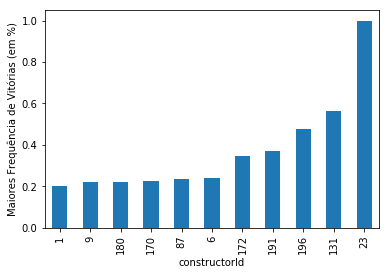

In [555]:
dados_taxa_filtrado1.plot(kind='bar', legend=False)
plt.ylabel("Maiores Frequência de Vitórias (em %)")

In [556]:
#taxa de vitoria de cada corredor
dados_quali[["driverId", "position"]].head()

,driverId,position
0,1,1
1,9,2
2,5,3
3,13,4
4,2,5


In [557]:
corredor_taxa = pd.crosstab(dados_quali['driverId'],dados_quali['position'], normalize = "index" )

In [558]:
corredor_taxa_filtrado = corredor_taxa.sort_values(by=1).tail(11)
corredor_taxa_filtrado.head()

position,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
driverId,,,,,,,,,,,,,,,,,,,,,
35,0.084337,0.036145,0.072289,0.036145,0.012048,0.036145,0.024096,0.048193,0.096386,0.060241,...,0.000000,0.0,0.012048,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
77,0.086957,0.043478,0.130435,0.217391,0.152174,0.043478,0.086957,0.065217,0.000000,0.021739,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
844,0.142857,0.047619,0.071429,0.119048,0.047619,0.000000,0.023810,0.071429,0.119048,0.023810,...,0.047619,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.145631,0.145631,0.048544,0.038835,0.067961,0.087379,0.097087,0.038835,0.067961,0.038835,...,0.004854,0.0,0.000000,0.0,0.004854,0.000000,0.0,0.0,0.0,0.0
57,0.161290,0.016129,0.129032,0.080645,0.080645,0.048387,0.112903,0.177419,0.096774,0.032258,...,0.000000,0.0,0.000000,0.0,0.000000,0.016129,0.0,0.0,0.0,0.0


In [559]:
corredor_taxa_filtrado1 = corredor_taxa_filtrado.loc[:,[1]].head(11)

Text(0, 0.5, 'Maiores Frequência de Vitórias (em %)')

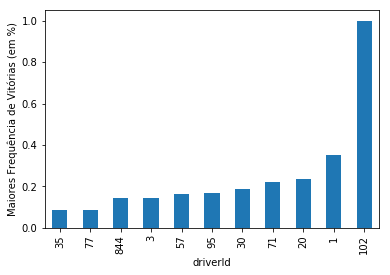

In [560]:
corredor_taxa_filtrado1.plot(kind='bar', legend=False)
plt.ylabel("Maiores Frequência de Vitórias (em %)")

___

## Técnicas de análise: variáveis qualitativas

## Random forest

Esta técnica utilizada pelo grupo se baseia, como sugerido pelo seu nome, em um conjunto de árvores de decisões, assim, com várias ramificações, possibilidades. Cada uma dessas árvores trabalha de forma individual de modo a gerar uma possível predição. O resultado obtido no classificador será validado conforme a predição predominante entre as árvores.

A primeira coisa feita foi separar, com base no dataframe, chamado "dados", separá-lo a fim de se ter uma parte para o treino e uma para os testes.

In [561]:
dados.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
13,7556,1,15,7,9,3,3,10,1
14,7557,1,10,7,10,4,4,6,1
16,7559,1,3,3,16,6,6,1,1


In [562]:
msk = np.random.rand(len(dados)) < 0.8

In [563]:
train = dados[msk]

In [564]:
train.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
13,7556,1,15,7,9,3,3,10,1
14,7557,1,10,7,10,4,4,6,1
16,7559,1,3,3,16,6,6,1,1


In [565]:
test = dados[~msk]
test.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
36,7580,2,1,1,1,7,7,11,2
50,7595,3,17,9,14,2,2,4,17
53,7598,3,5,1,2,5,5,10,17
76,7619,4,8,6,4,6,6,11,3
95,7640,5,2,2,6,7,7,10,4


In [566]:
y_train = train['positionOrder']
x_train = train.drop(columns = ['positionOrder', 'position'])

In [567]:
y_test = test['positionOrder']
x_test = test.drop(columns=['positionOrder', 'position'])

In [568]:
y_test.dtype

dtype('int64')

In [569]:
y_train.dtype

dtype('int64')

In [570]:
#plt.scatter(x_test.points, y_test)

In [571]:
x_test.head()

,resultId,raceId,driverId,constructorId,number,rank,circuitId
36,7580,2,1,1,1,11,2
50,7595,3,17,9,14,4,17
53,7598,3,5,1,2,10,17
76,7619,4,8,6,4,11,3
95,7640,5,2,2,6,10,4


In [572]:
#x_train.points.corr(y_train)

In [573]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

O encoder usado acima possibilita conversão de variáveis categóricas em qualitativas. A partir disso, implementa-se o modelo Random Forest

In [574]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0,n_jobs = -1)
model.fit(x_train_encoded, y_train) #treina o modelo

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [575]:
model.score(x_train_encoded,y_train) # taxa de acertos do treinamento (esperado dar 1)

1.0

#### realização dos testes:

A priori, testa-se a **acurácia** do modelo, depois, ele é **testado**

In [576]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

In [577]:
y_predict = model.predict(x_test_encoded)

In [578]:
acc_RandomForestClassifier= model.score(x_test_encoded, y_test)

In [579]:
acc_RandomForestClassifier

0.23752635277582573

## Matriz de Confusão

Com esta matriz podemos concluir os erros do nosso classificador. Pode-se perceber que o classificador está operando corretamente, pois mesmo com uma porcentagem "baixa", os valores próximos ao esperado estão mais altos que os não esperados.

In [580]:
matriz = confusion_matrix(y_test, y_predict)
matriz

array([[103,  38,  23,   5,   8,   6,   6],
       [ 65,  44,  40,  22,  14,   7,   6],
       [ 34,  53,  37,  25,  18,  17,  21],
       [ 26,  41,  42,  21,  30,  30,  29],
       [ 22,  24,  29,  30,  35,  30,  46],
       [ 13,  14,  27,  19,  25,  36,  61],
       [ 19,  13,  15,  13,  18,  61,  62]], dtype=int64)

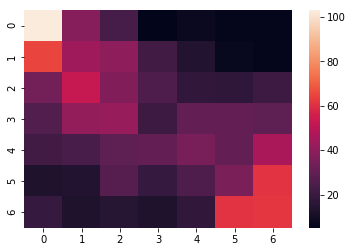

In [581]:
sns.heatmap(matriz)

Substituindo predições no dataset de teste:

In [582]:
test['PositionPredict'] = y_predict

C:\Users\Vitor Miada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [583]:
y_predict_proba = model.predict_proba(x_test_encoded)

In [584]:
y_predict_proba

array([[0.2 , 0.11, 0.2 , ..., 0.13, 0.17, 0.07],
       [0.2 , 0.15, 0.2 , ..., 0.16, 0.1 , 0.1 ],
       [0.06, 0.03, 0.08, ..., 0.17, 0.28, 0.18],
       ...,
       [0.4 , 0.41, 0.11, ..., 0.01, 0.05, 0.  ],
       [0.05, 0.13, 0.07, ..., 0.15, 0.12, 0.45],
       [0.11, 0.31, 0.18, ..., 0.37, 0.01, 0.02]])

In [585]:
test['bPredictProba'] = y_predict_proba[:,1]

C:\Users\Vitor Miada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [586]:
resultados = test.sort_values(by='bPredictProba')[['driverId', 'constructorId', 'raceId', 'circuitId', 'positionOrder', 'PositionPredict']].head(20)


In [587]:
resultados.sort_values(by = 'PositionPredict')

,driverId,constructorId,raceId,circuitId,positionOrder,PositionPredict
18546,373,172,745,46,7,1
17700,373,172,711,13,1,1
24034,815,10,1001,13,5,5
3988,55,15,190,22,6,6
4119,63,21,196,6,4,6
4426,78,15,210,21,7,6
23733,839,10,986,32,5,6
5103,49,15,241,25,5,6
7594,88,33,327,34,7,6
23959,839,10,997,70,6,6


## Logistic Regression

In [588]:
msk2 = np.random.rand(len(dados)) < 0.8

In [589]:
train2 = dados[msk2]

In [590]:
test2 = dados[~msk2]

In [591]:
y_train2 = train2['positionOrder']
x_train2 = train2.drop(columns=['positionOrder', 'position','resultId'])

In [592]:
y_test2 = test2['positionOrder']
x_test2 = test2.drop(columns=['positionOrder', 'position','resultId'])

In [593]:
encoder2 = OneHotEncoder(handle_unknown='ignore')
x_train2_encoded = encoder.fit_transform(x_train2.astype(str).values)

In [594]:
model2 = LogisticRegression(solver='lbfgs', multi_class='auto')

In [595]:
model2.fit(x_train2_encoded, y_train2)

C:\Users\Vitor Miada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [596]:
x_test2_encoded = encoder.transform(x_test2.astype(str).values)

In [597]:
y_pred2 = model2.predict(x_test2_encoded)

In [598]:
acc = accuracy_score(y_test2, y_pred2)

In [599]:
acc

0.09742895805142084

In [600]:
matriz2 = confusion_matrix(y_test2, y_pred2)
matriz2

array([[65, 67, 25, 21, 15,  3,  6],
       [68,  6, 52, 29, 25, 13,  8],
       [37, 52, 13, 36, 32, 18, 19],
       [33, 30, 38,  2, 43, 28, 30],
       [30, 22, 32, 34, 12, 40, 41],
       [19, 14, 27, 25, 42, 19, 84],
       [19, 20, 22, 27, 40, 68, 27]], dtype=int64)

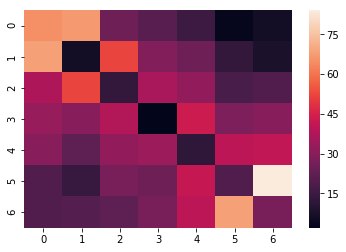

In [601]:
sns.heatmap(matriz2)

## Decision Tree


In [602]:
msk3 = np.random.rand(len(dados)) < 0.8

In [603]:
train3 = dados[msk3]

In [604]:
test3 = dados[~msk3]

In [605]:
y_train3 = train3['positionOrder']
x_train3 = train3.drop(columns=['positionOrder', 'position','resultId'])

In [606]:
encoder3 = OneHotEncoder(handle_unknown='ignore')
x_train3_encoded = encoder.fit_transform(x_train3.astype(str).values)

In [607]:
x_train_encoded

<5756x7423 sparse matrix of type '<class 'numpy.float64'>'
	with 40292 stored elements in Compressed Sparse Row format>

In [608]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train3_encoded, y_train3)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [609]:
y_test3 = test3['positionOrder']
x_test3 = test3.drop(columns=['positionOrder', 'position','resultId'])

In [610]:
x_test3_encoded = encoder.transform(x_test3.astype(str).values)

In [611]:
y_pred3 = regressor.predict(x_test3_encoded)

In [612]:
acc3 = accuracy_score(y_test3, y_pred3)

In [613]:
acc3

0.24748923959827834

In [614]:
matriz3 = confusion_matrix(y_test3, y_pred3)
matriz3

array([[98, 39, 24, 19, 13,  4, 12],
       [48, 49, 31, 18, 21,  3, 13],
       [26, 42, 39, 34, 24, 30, 18],
       [21, 30, 30, 35, 34, 21, 40],
       [14, 27, 28, 29, 34, 21, 53],
       [10, 16, 26, 26, 26, 30, 52],
       [ 9, 10, 22, 15, 29, 41, 60]], dtype=int64)

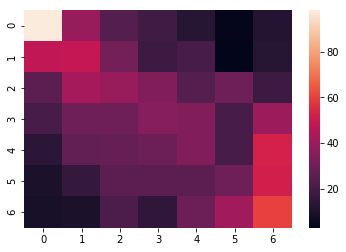

In [615]:
sns.heatmap(matriz3)